In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
from scipy.stats import pearsonr
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns 

**How much of a factor does the driver have on headway and on-time performance?**

- OPERATOR: Indicates the operator (driver)
- HDWY_DEV: calculates headway deviation in minutes as the difference between actual and scheduled headway. Negative values indicate a shorter headway than scheduled (i.e. bunching) and positive values indicate a longer headway than scheduled (i.e. gapping). 

Dependent variables:
- Headway (measured in seconds or any appropriate unit).
- On-time performance (usually measured as a binary variable, such as 1 for on time and 0 for late).

Independent variables:
- Driver-related factors (e.g., experience, training, behavior, etc.).
- Other potential independent variables like road conditions, weather, or vehicle maintenance.

In [2]:
headway_data = pd.read_csv("../data/headway_data.csv", delimiter = '\t')
headway_data.head(5)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC
0,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,2.666666,0,0,1,0,0.0,0,63,13.216666,0.076190
1,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1.966666,0,0,1,0,0.0,0,70,0.000000,0.056190
2,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,-0.483334,0,0,1,0,0.0,0,80,0.000000,-0.032222
3,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,-2.166667,0,0,1,0,0.0,0,97,10.800000,-0.144444
4,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,-3.883334,1,0,0,0,0.0,0,112,0.000000,-0.258889


How many unique operators are there? 

In [6]:
print(headway_data['OPERATOR'].nunique())

334


**Correlation Coefficient** - Headway

In [12]:
# comparing to 'headway'
corr = headway_data['OPERATOR'].corr(headway_data['HDWY_DEV'])

print(corr)

0.014016589769795128


There seems to be a weak relationship between OPERATOR and HDWY_DEV (amount of time you wait at a stop in between buses).

**Correlation Coefficient** - Actual arrival time

aka "on-time performance"

In [13]:
headway_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265884 entries, 0 to 265883
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                265884 non-null  int64  
 1   SERVICE_ABBR               265884 non-null  int64  
 2   ADHERENCE_ID               265884 non-null  int64  
 3   DATE                       265884 non-null  object 
 4   ROUTE_ABBR                 265884 non-null  int64  
 5   BLOCK_ABBR                 265884 non-null  int64  
 6   OPERATOR                   265884 non-null  int64  
 7   TRIP_ID                    265884 non-null  int64  
 8   OVERLOAD_ID                265884 non-null  int64  
 9   ROUTE_DIRECTION_NAME       265884 non-null  object 
 10  TIME_POINT_ABBR            265884 non-null  object 
 11  ROUTE_STOP_SEQUENCE        265884 non-null  float64
 12  TRIP_EDGE                  265884 non-null  int64  
 13  LATITUDE                   26

In [14]:
# Convert the "ACTUAL_ARRIVAL_TIME" column to integers using int(), but handle potential errors
try:
    headway_data['ACTUAL_ARRIVAL_TIME'] = headway_data['ACTUAL_ARRIVAL_TIME'].apply(int)
except ValueError:
    print("Error: Conversion to int failed for some values in the 'ACTUAL_ARRIVAL_TIME' column.")

# Calculate the correlation
corr = headway_data['OPERATOR'].corr(headway_data['ACTUAL_ARRIVAL_TIME'])
corr

Error: Conversion to int failed for some values in the 'ACTUAL_ARRIVAL_TIME' column.


TypeError: unsupported operand type(s) for /: 'str' and 'int'

**Regression Model**

- For linear regression, you're trying to find the relationship between driver-related factors and headway.

- For logistic regression, you're trying to find the relationship between driver-related factors and on-time performance.

**Linear Regression Model**

lm = smf.ols('target variable ~ predictor variable', data = df).fit()

lm.summary()

In [48]:
lm = smf.ols('HDWY_DEV ~ OPERATOR', data = headway_data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               HDWY_DEV   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     52.25
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           4.91e-13
Time:                        02:56:08   Log-Likelihood:            -9.0071e+05
No. Observations:              265884   AIC:                         1.801e+06
Df Residuals:                  265882   BIC:                         1.801e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2651      0.038      7.042      0.000       0.191       0.339
OPERATOR       0.0001    1.8e-05      7.228      0.000    9.46e-05       0.000
==============================================================================
Omnibus:                   519033.423   Durbin-Watson:                   1.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       8045874312.221
Skew:                          14.760   Prob(JB):                         0.00
Kurtosis:                     854.698   Cond. No.                     5.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The **intercept** is the predicted value of 'HDWY_DEV' when 'ADHERENCE' is zero.

For every one-minute change in 'ADHERENCE', 'HDWY_DEV' is expected to change by approximately -0.2279 minutes (or about 13.7 seconds) . The negative sign means that as 'ADHERENCE' increases (the bus leaves before the scehduled time), 'HDWY_DEV' is expected to decrease (become more negative).

In other words, as 'HDWY_DEV' becomes more negative (indicating shorter headway than scheduled, i.e., bunching), 'ADHERENCE' is expected to decrease, suggesting that adherence tends to be worse when buses are bunched. Conversely, when 'HDWY_DEV' becomes more positive (indicating longer headway than scheduled, i.e., gapping), 'ADHERENCE' is expected to increase, suggesting that adherence tends to be better when buses are more spaced out.

**Box Plots** - Work with a subset of the data

In [20]:
subset = headway_data.iloc[:49]
# subset.to_csv('../data/subset.csv', sep='\t' , index=False)
subset.head(3)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC
0,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,2.666666,0,0,1,0,0.0,0,63,13.216666,0.076190
1,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1.966666,0,0,1,0,0.0,0,70,0.000000,0.056190
2,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,-0.483334,0,0,1,0,0.0,0,80,0.000000,-0.032222


In [21]:
subset['OPERATOR'].unique()

array([1040, 2374, 2689], dtype=int64)

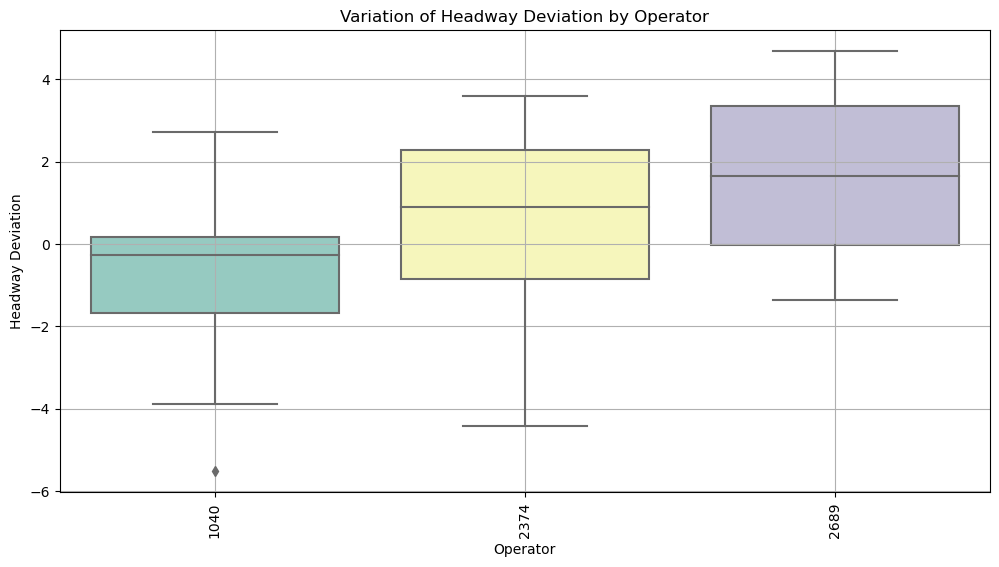

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=subset, x='OPERATOR', y='HDWY_DEV', palette='Set3')
plt.xlabel('Operator')
plt.ylabel('Headway Deviation')
plt.title('Variation of Headway Deviation by Operator')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

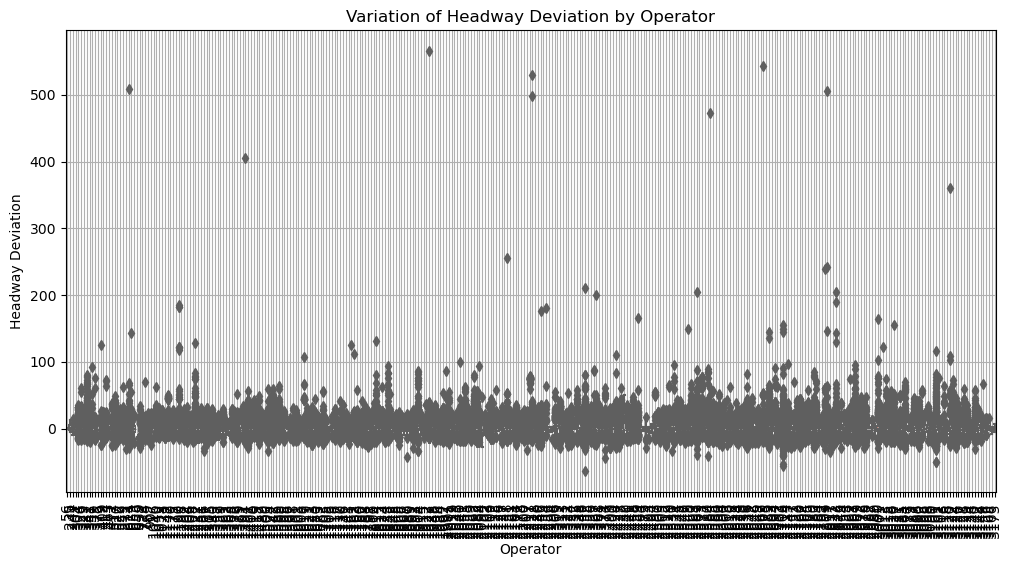

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=headway_data, x='OPERATOR', y='HDWY_DEV', palette='Set3')
plt.xlabel('Operator')
plt.ylabel('Headway Deviation')
plt.title('Variation of Headway Deviation by Operator')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

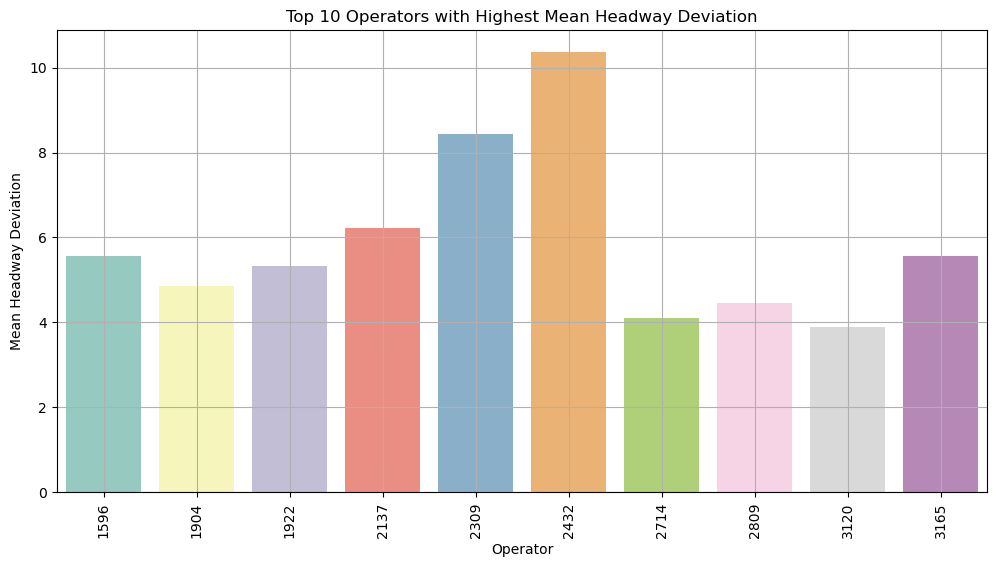

In [27]:
# Group the data by 'OPERATOR' and calculate the mean headway deviation for each operator
operator_mean_hdwy_dev = headway_data.groupby('OPERATOR')['HDWY_DEV'].mean()

# Sort the operators by mean headway deviation in descending order and select the top N
top_n_operators = operator_mean_hdwy_dev.sort_values(ascending=False).head(10) # selecting top 10

# Create a bar chart for the top N operators
plt.figure(figsize=(12, 6))
sns.barplot(x=top_n_operators.index, y=top_n_operators, palette='Set3')
plt.xlabel('Operator')
plt.ylabel('Mean Headway Deviation')
plt.title(f'Top {10} Operators with Highest Mean Headway Deviation')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [45]:
# Group the data by 'OPERATOR' and calculate the mean headway deviation for each operator
operator_mean_hdwy_dev = headway_data.groupby('OPERATOR')['HDWY_DEV'].mean()

# Define the lower and upper bounds for the margin
lower_bound = -5
upper_bound = 5

# Filter operators with mean headway deviation within the specified range
selected_operators = operator_mean_hdwy_dev[(operator_mean_hdwy_dev >= lower_bound) & (operator_mean_hdwy_dev <= upper_bound)]

# Sort the selected operators by their mean headway deviation in ascending order
sorted_selected_operators = selected_operators.sort_values()

# Select the top 10 operators with consistent margins
top_10_operators = sorted_selected_operators.head(10)

# Print the top 10 operators
print(top_10_operators)

OPERATOR
2338   -4.555556
2493   -3.862963
2646   -3.360834
2675   -2.629115
1706   -2.541892
1730   -2.414417
1606   -2.316667
3127   -2.297917
2563   -2.234500
2586   -2.165044
Name: HDWY_DEV, dtype: float64


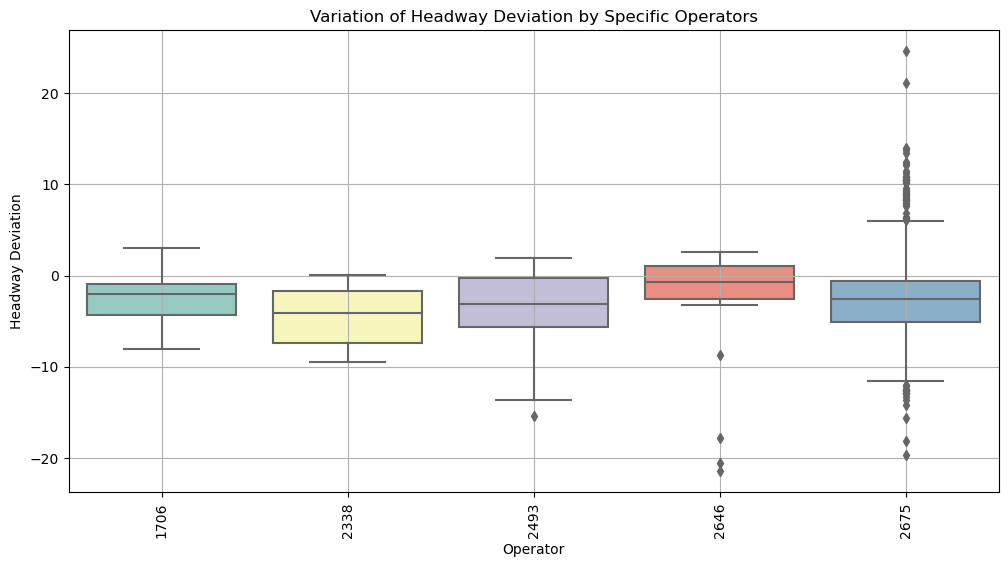

In [46]:
# Specify the list of specific operators you want to include
specific_operators = [2338, 2493, 2646, 2675, 1706]

# Filter the data to include only the specific operators
filtered_data = headway_data[headway_data['OPERATOR'].isin(specific_operators)]

# Create a box plot for the specific operators
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='OPERATOR', y='HDWY_DEV', palette='Set3')
plt.xlabel('Operator')
plt.ylabel('Headway Deviation')
plt.title('Variation of Headway Deviation by Specific Operators')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

**Statistics on OPERATOR dataframe**

In [33]:
# Grouping by OPERATOR and computing the mean, standard deviation, and count for HDWY_DEV and ADHERENCE
operator_stats = headway_data.groupby('OPERATOR').agg({
    'HDWY_DEV': [('mean_HDWY_DEV', 'mean'),
                 ('std_HDWY_DEV', 'std'),
                 ('count_HDWY_DEV', 'count')],
    'ADHERENCE': [('mean_ADHERENCE', 'mean'),
                  ('std_ADHERENCE', 'std')]
}).reset_index()

# Rename columns 
operator_stats.columns = operator_stats.columns.droplevel(0)
operator_stats.rename(columns={'': 'OPERATOR'}, inplace=True)

operator_stats.head(3)

,OPERATOR,mean_HDWY_DEV,std_HDWY_DEV,count_HDWY_DEV,mean_ADHERENCE,std_ADHERENCE
0,56,-0.250000,0.730677,2,-1.391667,2.133105
1,235,1.918518,6.305770,9,-4.198148,4.327668
2,244,-0.037500,6.095262,20,-3.509166,4.600875


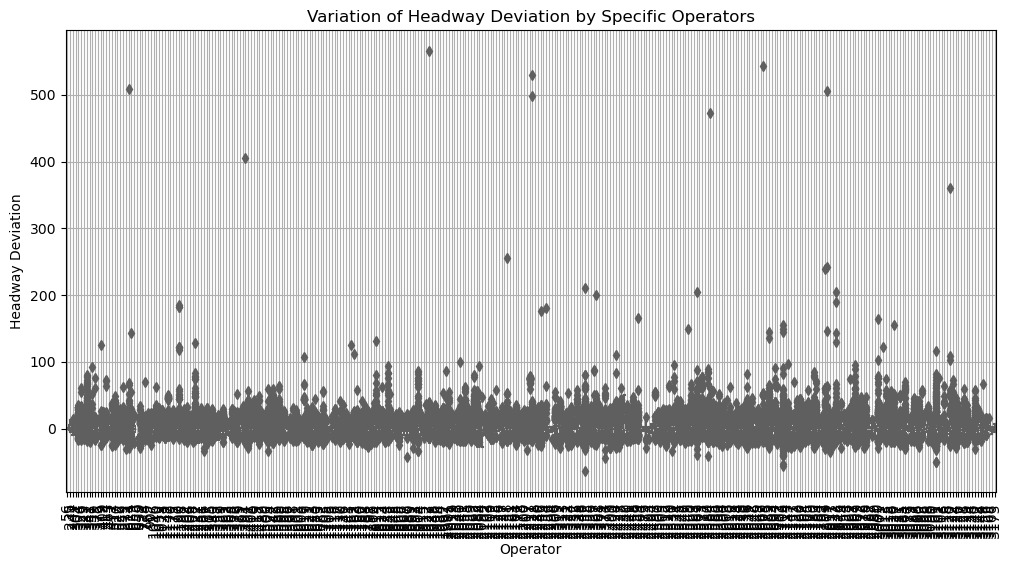

In [35]:
# Create a box plot for the specific operators
plt.figure(figsize=(12, 6))
sns.boxplot(data=headway_data, x='OPERATOR', y='HDWY_DEV', palette='Set3')
plt.xlabel('Operator')
plt.ylabel('Headway Deviation')
plt.title('Variation of Headway Deviation by Specific Operators')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [36]:
headway_data['PREV_SCHED_STOP_CANCELLED'].unique()

array([0., 1.])

In [37]:
ex = headway_data[headway_data['PREV_SCHED_STOP_CANCELLED'] == 1]

In [38]:
ex


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC
23,120230801,1,99457932,2023-08-01,22,2200,1040,345116,0,TO DOWNTOWN,...,-0.033334,0,0,1,1,1.0,0,387,0.000000,-0.000667
32,120230801,1,99457946,2023-08-01,22,2200,2374,345121,0,TO DOWNTOWN,...,-3.950000,0,0,1,1,1.0,0,522,3.316666,-0.079000
41,120230801,1,99457960,2023-08-01,22,2200,2374,345125,0,TO DOWNTOWN,...,2.883333,0,0,1,1,1.0,0,657,0.000000,0.057667
52,120230801,1,99457975,2023-08-01,22,2200,2689,345129,0,TO DOWNTOWN,...,-5.133334,0,0,1,1,1.0,0,795,0.000000,-0.102667
86,120230801,1,99458025,2023-08-01,22,2201,1617,345215,0,TO DOWNTOWN,...,-3.016667,0,0,1,1,1.0,0,87,0.000000,-0.065580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264181,120230930,2,100404168,2023-09-30,52,5200,3098,351968,0,FROM DOWNTOWN,...,19.450000,0,0,1,0,1.0,0,280,0.000000,0.926190
264183,120230930,2,100404170,2023-09-30,52,5200,3098,351968,0,FROM DOWNTOWN,...,20.183333,0,0,1,0,1.0,0,292,0.000000,0.917424
264526,120230930,2,100404672,2023-09-30,52,5212,2642,352224,0,FROM DOWNTOWN,...,6.483333,0,1,0,0,1.0,0,194,0.000000,0.324167
264527,120230930,2,100404673,2023-09-30,52,5212,2642,352224,0,FROM DOWNTOWN,...,6.233333,0,1,0,0,1.0,0,199,0.000000,0.311667


In [43]:
ex['HDWY_DEV'].nlargest()

205327    543.833333
142982    498.066666
107726    361.033333
173179    255.783333
121       181.816666
Name: HDWY_DEV, dtype: float64

In [40]:
ex2 = headway_data[headway_data['PREV_SCHED_STOP_CANCELLED'] == 0]
ex2.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC
0,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,2.666666,0,0,1,0,0.0,0,63,13.216666,0.076190
1,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1.966666,0,0,1,0,0.0,0,70,0.000000,0.056190
2,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,-0.483334,0,0,1,0,0.0,0,80,0.000000,-0.032222
3,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,-2.166667,0,0,1,0,0.0,0,97,10.800000,-0.144444
4,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,-3.883334,1,0,0,0,0.0,0,112,0.000000,-0.258889


In [44]:
ex2['HDWY_DEV'].nlargest()

205178    565.433333
142984    529.550000
40558     508.700000
247984    505.233333
95138     472.366666
Name: HDWY_DEV, dtype: float64

In [45]:
headway_data['OVERLOAD_ID'].unique()

array([0, 1, 3, 2, 4], dtype=int64)

In [46]:
not_part = headway_data[headway_data['OVERLOAD_ID'] != 0]
not_part

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC
117,120230801,1,99458114,2023-08-01,22,2201,1892,345216,1,FROM DOWNTOWN,...,-2.033334,0,0,1,0,0.0,0,116,0.000000,-0.135556
118,120230801,1,99458115,2023-08-01,22,2201,1892,345216,1,FROM DOWNTOWN,...,1.566666,0,0,1,0,0.0,0,131,0.000000,0.104444
1782,120230801,1,99461507,2023-08-01,50,5002,1938,346925,1,FROM DOWNTOWN,...,5.066666,0,1,0,0,0.0,0,77,8.416666,0.337778
1783,120230801,1,99461508,2023-08-01,50,5002,1938,346925,1,FROM DOWNTOWN,...,7.366666,0,1,0,0,0.0,0,84,0.000000,0.460417
1784,120230801,1,99461509,2023-08-01,50,5002,1938,346925,1,FROM DOWNTOWN,...,8.150000,0,1,0,0,0.0,0,89,0.000000,0.509375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262217,120230929,1,100383665,2023-09-29,56,5607,653,353049,1,TO DOWNTOWN,...,-3.600000,0,0,1,0,0.0,0,230,0.000000,-0.360000
262218,120230929,1,100383666,2023-09-29,56,5607,653,353049,1,TO DOWNTOWN,...,-1.666667,0,0,1,0,0.0,0,239,0.000000,-0.166667
264337,120230930,2,100404412,2023-09-30,52,5202,1938,352074,1,FROM DOWNTOWN,...,-1.516667,0,0,1,0,0.0,0,204,2.650000,-0.075833
264338,120230930,2,100404413,2023-09-30,52,5202,1938,352074,1,FROM DOWNTOWN,...,-0.633334,0,0,1,0,0.0,0,209,1.716666,-0.031667


In [49]:
not_part['HDWY_DEV'].describe()

count    915.000000
mean       0.837413
std       13.286847
min      -42.683334
25%       -4.725000
50%       -0.033334
75%        5.775000
max      255.783333
Name: HDWY_DEV, dtype: float64

In [50]:
not_part['HDWY_DEV'].nlargest()

173179    255.783333
260568    102.283333
173176     40.333333
173177     40.233333
173180     40.200000
Name: HDWY_DEV, dtype: float64

In [52]:
outliers = headway_data[headway_data['HDWY_DEV'] > 50]
outliers.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC
119,120230801,1,99458118,2023-08-01,22,2202,1190,345297,0,TO DOWNTOWN,...,184.833333,0,0,1,0,0.0,0,2,12.733333,4.107407
120,120230801,1,99458119,2023-08-01,22,2202,1190,345297,0,TO DOWNTOWN,...,182.216666,0,0,1,0,0.0,0,18,0.000000,4.049259
121,120230801,1,99458120,2023-08-01,22,2202,1190,345297,0,TO DOWNTOWN,...,181.816666,0,0,1,1,1.0,0,26,0.000000,4.040370
129,120230801,1,99458134,2023-08-01,22,2202,1190,345302,0,TO DOWNTOWN,...,51.383333,0,0,1,1,1.0,0,161,0.000000,1.048639
4955,120230802,1,99491892,2023-08-02,22,2200,2809,345136,0,FROM DOWNTOWN,...,241.716666,0,0,1,0,0.0,0,1025,0.000000,8.057222


In [61]:
outliers['HDWY_DEV'].describe()

count    382.000000
mean      84.516797
std       71.258655
min       50.033333
25%       56.466667
50%       65.000000
75%       77.870833
max      565.433333
Name: HDWY_DEV, dtype: float64

In [63]:
outliers['PREV_SCHED_STOP_CANCELLED'].value_counts()

0.0    352
1.0     30
Name: PREV_SCHED_STOP_CANCELLED, dtype: int64

In [64]:
outliers['OVERLOAD_ID'].value_counts()

0    380
1      2
Name: OVERLOAD_ID, dtype: int64

In [66]:
outliers['IS_RELIEF'].value_counts()

0    381
1      1
Name: IS_RELIEF, dtype: int64

IS RELIEF column: 
- Assume 0 is TRUE. 1 is FALSE. 

In [67]:
outliers[outliers['IS_RELIEF'] == 1]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC
19536,120230804,1,99567439,2023-08-04,7,704,2357,353502,0,FROM DOWNTOWN,...,50.25,0,1,0,0,0.0,1,323,0.0,2.5125


In [68]:
is_relief = headway_data[headway_data['IS_RELIEF'] == 1]
is_relief

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC
43,120230801,1,99457963,2023-08-01,22,2200,2689,345126,0,FROM DOWNTOWN,...,-1.366667,0,0,1,0,0.0,1,686,17.566666,-0.113889
92,120230801,1,99458072,2023-08-01,22,2201,2427,345228,0,FROM DOWNTOWN,...,1.450000,0,0,1,0,0.0,1,536,3.950000,0.120833
140,120230801,1,99458151,2023-08-01,22,2202,1222,345307,0,FROM DOWNTOWN,...,5.616666,0,1,0,0,0.0,1,325,6.016666,0.468056
200,120230801,1,99458238,2023-08-01,22,2210,2125,345386,0,FROM DOWNTOWN,...,1.433333,0,0,1,0,0.0,1,178,12.466666,0.110256
259,120230801,1,99458332,2023-08-01,22,2211,1761,345416,0,FROM DOWNTOWN,...,0.233333,0,0,1,0,0.0,1,250,18.283333,0.017949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265728,120230930,2,100406171,2023-09-30,56,5605,3013,353014,0,FROM DOWNTOWN,...,2.066666,0,1,0,0,0.0,1,315,3.400000,0.103333
265764,120230930,2,100406428,2023-09-30,7,700,3090,353284,0,FROM DOWNTOWN,...,0.933333,0,0,1,0,0.0,1,315,7.183333,0.031111
265808,120230930,2,100406496,2023-09-30,7,701,2531,353381,0,FROM DOWNTOWN,...,0.550000,0,0,1,0,0.0,1,312,4.783333,0.018333
265847,120230930,2,100406558,2023-09-30,7,702,2103,353431,0,FROM DOWNTOWN,...,-2.516667,0,0,1,0,0.0,1,120,10.350000,-0.083889


In [69]:
is_relief['HDWY_DEV'].describe()

count    3608.000000
mean        0.402965
std         5.123976
min       -39.250000
25%        -2.133334
50%         0.041667
75%         2.316666
max        50.250000
Name: HDWY_DEV, dtype: float64

In [70]:
headway_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265884 entries, 0 to 265883
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                265884 non-null  int64  
 1   SERVICE_ABBR               265884 non-null  int64  
 2   ADHERENCE_ID               265884 non-null  int64  
 3   DATE                       265884 non-null  object 
 4   ROUTE_ABBR                 265884 non-null  int64  
 5   BLOCK_ABBR                 265884 non-null  int64  
 6   OPERATOR                   265884 non-null  int64  
 7   TRIP_ID                    265884 non-null  int64  
 8   OVERLOAD_ID                265884 non-null  int64  
 9   ROUTE_DIRECTION_NAME       265884 non-null  object 
 10  TIME_POINT_ABBR            265884 non-null  object 
 11  ROUTE_STOP_SEQUENCE        265884 non-null  float64
 12  TRIP_EDGE                  265884 non-null  int64  
 13  LATITUDE                   26

In [71]:
within_50 = headway_data[headway_data['HDWY_DEV'] > 50]
within_50

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC
119,120230801,1,99458118,2023-08-01,22,2202,1190,345297,0,TO DOWNTOWN,...,184.833333,0,0,1,0,0.0,0,2,12.733333,4.107407
120,120230801,1,99458119,2023-08-01,22,2202,1190,345297,0,TO DOWNTOWN,...,182.216666,0,0,1,0,0.0,0,18,0.000000,4.049259
121,120230801,1,99458120,2023-08-01,22,2202,1190,345297,0,TO DOWNTOWN,...,181.816666,0,0,1,1,1.0,0,26,0.000000,4.040370
129,120230801,1,99458134,2023-08-01,22,2202,1190,345302,0,TO DOWNTOWN,...,51.383333,0,0,1,1,1.0,0,161,0.000000,1.048639
4955,120230802,1,99491892,2023-08-02,22,2200,2809,345136,0,FROM DOWNTOWN,...,241.716666,0,0,1,0,0.0,0,1025,0.000000,8.057222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264572,120230930,2,100404728,2023-09-30,52,5212,3101,352232,0,FROM DOWNTOWN,...,62.650000,0,1,0,0,0.0,0,512,0.000000,1.566250
264770,120230930,2,100404983,2023-09-30,55,5501,2138,352400,0,FROM DOWNTOWN,...,53.000000,0,1,0,0,0.0,0,698,0.000000,1.766667
264771,120230930,2,100404984,2023-09-30,55,5501,2138,352400,0,FROM DOWNTOWN,...,51.566666,0,1,0,0,0.0,0,708,0.000000,1.718889
264772,120230930,2,100404985,2023-09-30,55,5501,2138,352400,0,FROM DOWNTOWN,...,51.166666,0,1,0,0,0.0,0,714,0.000000,1.705556
